<a href="https://colab.research.google.com/github/engcivilgabriel/Analysis-of-public-data/blob/master/Livros%20Bestsellers%20da%20Amazon%20entre%202009%20e%202019%20%2B%20Sistema%20de%20recomenda%C3%A7%C3%A3o%20de%20livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OS 50 LIVROS MAIS VENDIDOS DA AMAZON ENTRE 2009 E 2019**

<center><img alt="Amazon" width="60%" src="https://i0.wp.com/www.6sigmacertificationonline.com/wp-content/uploads/2017/10/amazon-logo-copy-800x258.png
"></center>

Amazon.com, Inc. é uma empresa multinacional de tecnologia norte-americana com sede em Seattle, Washington. A companhia se concentra no e-commerce, computação em nuvem, streaming e inteligência artificial. É considerada uma das cinco grandes empresas de tecnologia, juntamente com Google, Apple, Microsoft e Facebook. Foi referida como "uma das forças econômicas e culturais mais influentes do mundo" e a marca mais valiosa do mundo.

Fundada por Jeff Bezos em Bellevue, Washington, em 5 de julho de 1994, a empresa começou como um mercado online de livros, mas expandiu-se para vender eletrônicos, software, videogames, vestuário, móveis, alimentos, brinquedos e joias. Em 2015, a Amazon superou o Walmart como o varejista mais valioso dos Estados Unidos por capitalização de mercado. Em 2017, a Amazon adquiriu o Whole Foods Market por US$13,4 bilhões, aumentando substancialmente sua presença como varejista física. Em 2018, a companhia anunciou que o seu serviço de entrega em dois dias, o Amazon Prime, havia ultrapassado 100 milhões de assinantes em todo o mundo.

**`Fonte: Wikipédia, a enciclopédia livre.`**

##O Projeto

> O objetivo deste projeto é analisar e buscar insights sobre os livros mais vendidos pela Amazon entre os anos de 2009 e 2019, **criar um sistema de recomendação de livros baseados nos dados apresentados**, bem como buscar meios de melhor visualizar estes dados.

Utilizando dados disponibilizados no [Kaggle]('https://kaggle.com/'), construiremos um modelo de Machine Learning capaz de nos ajudar a prever possíveis recomendações, que podem ajudar consumidores a tomarem decisões afim de potencializar suas leituras e aumentar a qualidade de suas vidas por gastarem menos tempo em busca de novos livros.

In [116]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [117]:
# importando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Origem dos dados
O presente Dataset foi confeccionado por Sooter Saalu através de webscrapping dos sites da da Amazon e Gooreads em Outubro de 2020. Foram levantados 550 livros e os dados foram categorizados em ficção e não ficção. 

O arquivo para download pode ser localizado em: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019



A seguir podemos ver como foi feita a disposição dos dados, bem como averiguar as 5 primeiras linhas do dataset.

In [118]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/engcivilgabriel/Analysis-of-public-data/master/CSV/bestsellers%20with%20categories.csv', engine='python')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Então, dividiu-se as informações entre o nome dos livros, seu respectivo autor, a avaliação dos usuários, quantos reviews ele apresenta, seu preço, o ano da sua edição e seu respectivo gênero literário.

##Análise exploratória dos dados

Com esta noção de como foi feito o dataset, vamos agora entender suas características. Para isso, analisaremos as informações pertinentes às suas variáveis:

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Percebe-se que o dataset apresenta 550 linhas e 7 colunas, bem como não apresenta ausência de informações para nenhuma variável, o que é o ideal. Agora, em relação à divisão entre os gêneros literários, podemos averiguar a seguinte divisão:

###Por gênero literário

In [120]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Ou seja, em termos percentuais, tem-se:

In [121]:
df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

Portanto, existem mais livros de **não ficção** nas classificações de bestsellers, o que **corresponde a cerca de 56% do conjunto de dados**.

###Por classificação pelos leitores

Analisando agora a classificação dada pelos leitores, objetivando iniciar a filtragem dos livros mais relevantes para esta análise e considerando àqueles livros que tiveram mais de 3.000 avaliações, pode-se extrair as seguintes informações:

In [122]:
# Livros com melhor classificação (Recebido por pelo menos 3000 pessoas)
data_order = df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
data_order = data_order[data_order['Reviews']>3000]
data_order = data_order.sort_values('User Rating', ascending=False).head(20)
data_order

,Name,Author,Genre,User Rating,Reviews
177,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9,3192.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
118,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,Fiction,4.9,7758.0
119,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,Fiction,4.9,3146.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9,7038.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9,5062.0
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0
312,The Wonderful Things You Will Be,Emily Winfield Martin,Fiction,4.9,8842.0


O ranking por classificação fornece um número relativamente alto de classificações máximas (4.9). No entanto, podemos ver diferenças significativas no número de resenhas, com alguns livros tendo pouco mais de 3.000 resenhas enquanto alguns têm cerca de 20.000.

Assim, uma avaliação ponderada, que leva em consideração o número de resenhas, será a melhor opção para esta classificação.

$$Classificação Ponderada(CP)=(\frac{r}{(r+m)}*M) + (\frac{m}{(r+m)}*C)$$

Onde:

*   M = classificação média do livro
*   r = número de resenhas do livro
*   m = avaliações mínimas exigidas para entrar na lista dos mais vendidos
*   C = a classificação média no conjunto de dados

In [123]:
# Avaliação Ponderada
m = min(df['Reviews'])
C = df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    r = x['Reviews']
    M = x['User Rating']
    return (r/(r+m) * M) + (m/(m+r) * C)

Vamos aplicar esta avaliação no dataset:

In [124]:
df['Weighted Rating'] = df.apply(weighted_rating, axis=1)

E, agora, vamos classificar as linhas por ordem decrescente da classificação ponderada:

In [125]:
df.groupby(['Name','Author','Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

,Name,Author,Genre,User Rating,Reviews,Weighted Rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,11881.0,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0,4.898894


Embora várias linhas na coluna de classificação ponderada ainda possam ser arredondadas para 4.9, há uma diferença suficiente entre os vários livros para que eles possam ser classificados. À parte, nove dos dez melhores livros, de acordo com as classificações ponderadas, pertencem ao gênero de ficção. **Isso pode ser visto como um sinal do domínio do gênero de ficção nas classificações de classificação**. Agora, quanto ao gênero literário e seu peso nesta classificação ponderada, tem-se o seguinte:

In [126]:
df.groupby(['Genre'])['Weighted Rating'].mean()

Genre
Fiction        4.648178
Non Fiction    4.595980
Name: Weighted Rating, dtype: float64

A magia da ciência de dados se fez presente! **Pela classificação ponderada, os livros de ficção passam a ter uma maior representatividade entre os mais vendidos.**

###Por preço dos livros

Agora, vamos ver como os padrões de preço dos livros nos 50 livros mais vendidos na Amazon influenciam nossa análise:

In [127]:
df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

,Name,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
333,Watchmen,Alan Moore,Fiction,42.0
281,The Official SAT Study Guide,The College Board,Non Fiction,40.0
220,The Alchemist,Paulo Coelho,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


Existem 6 livros de não ficção entre os 10 bestsellers mais caros da Amazon. Olhando para as classificações, os livros de ficção no Top 5 são coleções ou combinações de uma série de livros, enquanto os livros de não ficção são textos instrucionais e educacionais. Ambos os gêneros têm preços caros devido ao seu tamanho maior (quantidade relativamente grande de páginas). Agora, quanto a classificação de gênero literário quanto ao preço médio dos livros, tem-se o seguinte:

In [128]:
df.groupby(['Genre'], as_index=False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


**Em média, as publicações de não ficção custam mais do que as de ficção**. Considerando que os livros didáticos para todas as profissões e campos do saber humano, biografias e outras publicações instrucionais se enquadram na não-ficção, percebe-se haver uma tendência definida para os livros de não-ficção custarem mais.

###Por quantidade de reviews

Vamos agora examinar os padrões das quantidades de resenhas de livros nas classificações dos mais vendidos:

In [129]:
#Livros com mais resenhas
df.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Author,Name,Genre,Weighted Rating,Reviews
87,Delia Owens,Where the Crawdads Sing,Fiction,4.799924,87841.0
243,Paula Hawkins,The Girl on the Train,Fiction,4.100241,79446.0
231,Michelle Obama,Becoming,Non Fiction,4.799890,61133.0
128,Gillian Flynn,Gone Girl,Fiction,4.000399,57271.0
182,John Green,The Fault in Our Stars,Fiction,4.699940,50482.0
200,Kristin Hannah,The Nightingale: A Novel,Fiction,4.799864,49288.0
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,Fiction,3.800640,47265.0
15,Andy Weir,The Martian,Fiction,4.699924,39459.0
21,Anthony Doerr,All the Light We Cannot See,Fiction,4.600019,36348.0
245,Paulo Coelho,The Alchemist,Fiction,4.699916,35799.0


Nove em cada dez livros dos bestsellers com mais críticas, em média, são do gênero ficção. Como esta classificação considera as resenhas médias, os livros de não ficção que podem não vir frequentemente em série não estão em desvantagem, no entanto, apenas Becoming de Michelle Obama aparece entre os de gênero de não ficção.

É interessante observar esta distribuição no seguinte gráfico de dispersão:

In [130]:
import plotly.offline as py
import plotly.graph_objs as go

dt = df.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)
fig = go.Figure(data=go.Scatter(
    x=dt['Weighted Rating'],
    y=dt['Reviews'],
    mode='markers+text',
    text=dt['Author'],
    textposition='top center',
    marker=dict(size=15,
                color=np.random.randn(20),
                colorscale='Viridis',
                showscale=False
                )
))

fig.update_layout(
    title="Os 10 autores com mais resenhas e suas respectivas classificações ponderadas",
    xaxis_title="Classificação ponderada",
    yaxis_title="Resenhas"
)

fig.show()

Agora, quanto a classificação de gênero literário em relação à quantidade de resenhas dos livros, tem-se o seguinte:

In [131]:
df.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

Em média, os livros de ficção acumulam mais resenhas do que seus equivalentes de não ficção, com uma lacuna relativamente grande entre os dois gêneros.

###Por tendência ao longo dos anos

Examinaremos agora a tendência das resenhas, avaliações e preços dos livros na lista dos 50 mais vendidos da Amazon ao longo dos anos.

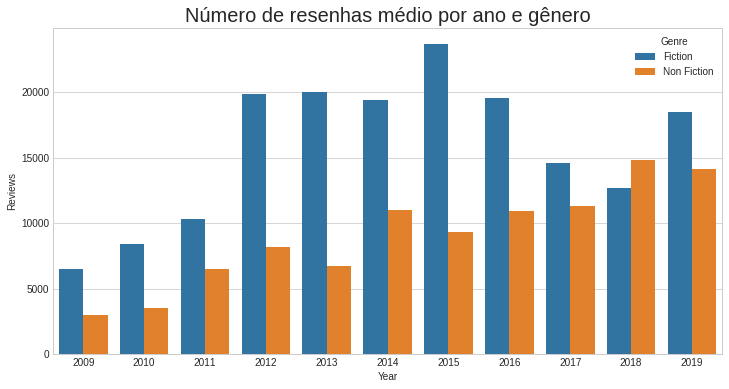

In [132]:
genre_reviews = df.groupby(["Genre","Year"],as_index=False)["Genre","Reviews"].mean()#,as_index=False
plt.figure(figsize=(12,6))
plt.style.use("seaborn-whitegrid")
sns.barplot(x ="Year",y="Reviews",hue = "Genre",data = genre_reviews)
plt.title("Número de resenhas médio por ano e gênero",Fontsize=20)
plt.show()

O número de resenhas de best-sellers da Amazon apresenta uma tendência média de aumento. As publicações de ficção se destacam nas resenhas em todos os anos, exceto 2018.

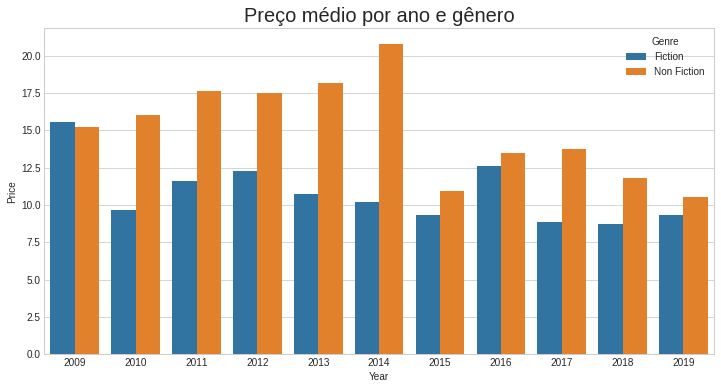

In [133]:
price_reviews = df.groupby(["Genre","Year"],as_index=False)["Genre","Price"].mean()#,as_index=False
plt.figure(figsize=(12,6))
plt.style.use("seaborn-whitegrid")
sns.barplot(x ="Year",y="Price",hue='Genre',data = price_reviews)
plt.title("Preço médio por ano e gênero",Fontsize=20)
plt.show()

O preço médio dos livros na lista dos mais vendidos da Amazon apresenta uma tendência de queda na última década, com uma mudança acentuada de 2014 a 2015. Livros de não ficção tiveram preços mais altos em média de 2010 para baixo, com 2009 sendo o único ano em que os livros de ficção são mais caro em média.

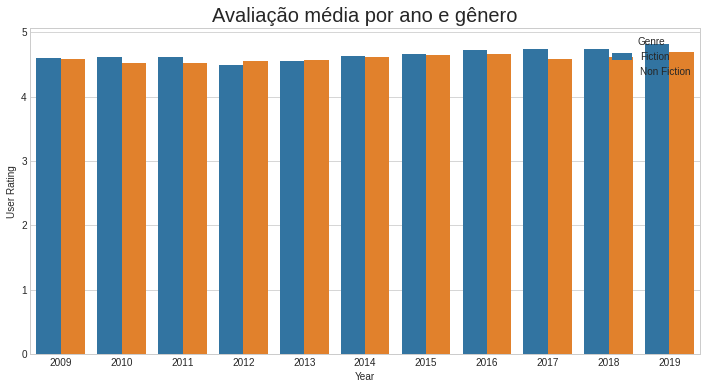

In [134]:
ratings_reviews = df.groupby(["Genre","Year"],as_index=False)["Genre","User Rating"].mean()#,as_index=False
plt.figure(figsize=(12,6))
plt.style.use("seaborn-whitegrid")
sns.barplot(x ="Year",y="User Rating",hue='Genre',data = ratings_reviews)
plt.title("Avaliação média por ano e gênero",Fontsize=20)
plt.show()

As avaliações tiveram um ligeiro aumento em média de cerca de 0,2 e os livros de ficção se mostram mais bem classificados dos que o de não ficção, os quais tiveram uma classificação superior em 2012 e 2013.

###Conclusão

Há mais livros de não ficção na lista dos mais vendidos ao longo dos anos e esses livros de não ficção são mais caros do que seus equivalentes, em média. No entanto, os livros de ficção são avaliados com mais frequência e têm uma classificação mais elevada, em média.

##Sistema de recomendação de livros

O objetivo principal desta etapa é apenas fazer um sistema de recomendação. Para isso, vamos importar as bibliotecas que serão utilizadas neste processo e criar uma nova coluna de descrição para cada livro.

In [135]:
#Importar bibliotecas necessárias
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Adicionando descrições aos livros:

In [136]:
data = df
data['Description']=np.load('/content/Book_description.npy')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating,Description
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826,4.5/5 · Barnes & Noble\n4.8/5 · Walmart\n4.7/5...
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325,11/22/63 is a novel by Stephen King about a ti...
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841,3.9/5 · Goodreads\n4.9/5 · Barnes & Noble\n1/4...
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859,"Written more than 70 years ago, 1984 was Georg..."
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127,"Presenting the next must-have, fun-filled gift..."


Agora, vamos criar uma função para tokenizar os nomes dos livros e remover palavras irrelevantes.

In [137]:
# Esta função é remover palavras irrelevantes de uma coluna específica e tokenizar
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(example_sent) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

rem_stopwords_tokenize(data,'Description')

In [138]:
# Fazendo uma função para lematizar todas as palavras
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

lemmatize_all(data,'Description')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dando uma olhada nos dados atualizados:

In [139]:
data['Description'].head()

0    [4.5/5, ·, Barnes, &, Noble, 4.8/5, ·, Walmart...
1    [11/22/63, novel, Stephen, King, time, travele...
2    [3.9/5, ·, Goodreads, 4.9/5, ·, Barnes, &, Nob...
3    [Written, 70, year, ago, ,, 1984, George, Orwe...
4    [Presenting, next, must-have, ,, fun-filled, g...
Name: Description, dtype: object

Finalmente, vamos confeccionar uma função para definir a recomendação:

In [140]:
def set_rec_finder(na,number):
    def intersection(lst1, lst2): 
        return list(set(lst1) & set(lst2)) 
    def find_rec(name):
        x=list(data[data['Name']==name]['Description'].values)[0]
        score=[]
        for i in range(len(data)):
            score.append([len(intersection(x,data['Description'].values[i])),
                          data['Name'].values[i]])
        return score
    recommendations=find_rec(na)
    recommendations.sort(reverse=True)
    recommendations=np.array(recommendations)
    ans=recommendations[:number,1]
    for i in ans:
        print(i)

Vamos testar:

In [144]:
set_rec_finder('The Casual Vacancy',10)

The Casual Vacancy
The Mark of Athena (Heroes of Olympus, Book 3)
Little Fires Everywhere
Winter of the World: Book Two of the Century Trilogy
The Martian
The Lost Symbol
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
Old School (Diary of a Wimpy Kid #10)
Killing Jesus (Bill O'Reilly's Killing Series)
Harry Potter and the Cursed Child, Parts 1 & 2, Special Rehearsal Edition Script
